### SQL
1. SELECT COUNT(company_name) FROM jobs WHERE company_name LIKE'%DBS%'
2. SELECT * FROM jobs WHERE company_name ILIKE '%Pte. Ltd%'
3. SELECT date_posted, COUNT(*) as day from jobs GROUP BY date_posted ORDER BY date_posted
4. SELECT COUNT(*) FROM jobs GROUP BY EXTRACT(MONTH FROM date_posted)

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,confusion_matrix,accuracy_score, classification_report
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

from sklearn.feature_extraction.text import CountVectorizer,HashingVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

from datetime import datetime
from scipy import sparse
from sklearn.metrics.pairwise import pairwise_distances
import re
import os
import time
import nltk
from sklearn import feature_extraction
import mpld3

In [2]:
df= pd.read_csv('./dataset/data.csv')

In [3]:
df.head()

,job_id,job_title,job_description,date_posted,company_name
0,dc4c44bf442f4baa57f22233fee9195b75d62baa3b0265...,BUSINESS DEVELOPMENT (FREIGHT FORWARDING),- Roles &amp; Responsibilities : Job Role Desc...,2020-11-27,CALL LADE ENTERPRISES PTE LTD
1,39fc119781f2337a52de7300f21b76cda9b2c0202bfec9...,Secretary/PA,- Roles &amp; Responsibilities : Job Scope:<br...,2020-11-26,TALENT TRADER GROUP PTE. LTD.
2,2bdd91d7794575aaefee738ef6c831f7129fe6172f713c...,Temporary 3-6months Admin Assistant (Office ho...,Monday to Friday Office hoursLocation : Buona ...,2020-11-14,Confidential
3,0c170932727e0246f27feb1a5641d0e26f44d26d431be6...,Program Management,- Roles &amp; Responsibilities : Key Responsib...,2020-11-09,YASH TECHNOLOGIES SINGAPORE PTE. LIMITED
4,458658ef725f6384d4c056f6a8b01747331ba7c3c5c2e5...,Automotive Software Engineers (C Programming /...,&bull; MNC&bull; $3500 - $6000 Basic + AWS + V...,2020-11-15,Confidential


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_id           3000 non-null   object
 1   job_title        3000 non-null   object
 2   job_description  3000 non-null   object
 3   date_posted      3000 non-null   object
 4   company_name     3000 non-null   object
dtypes: object(5)
memory usage: 117.3+ KB


In [6]:
df.isnull().sum()

job_id             0
job_title          0
job_description    0
date_posted        0
company_name       0
dtype: int64

In [7]:
df['job_title'].value_counts().head()

CHEF                              6
Quantity Surveyor                 6
Admin Assistant                   5
Business Development Executive    5
Operations Executive              4
Name: job_title, dtype: int64

In [8]:
df['job_title'].nunique()

2883

In [9]:
df['date_posted'] = pd.to_datetime(df['date_posted'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   job_id           3000 non-null   object        
 1   job_title        3000 non-null   object        
 2   job_description  3000 non-null   object        
 3   date_posted      3000 non-null   datetime64[ns]
 4   company_name     3000 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 117.3+ KB


In [11]:
df.drop('job_id', axis=1, inplace=True)

In [12]:
df.head()

,job_title,job_description,date_posted,company_name
0,BUSINESS DEVELOPMENT (FREIGHT FORWARDING),- Roles &amp; Responsibilities : Job Role Desc...,2020-11-27,CALL LADE ENTERPRISES PTE LTD
1,Secretary/PA,- Roles &amp; Responsibilities : Job Scope:<br...,2020-11-26,TALENT TRADER GROUP PTE. LTD.
2,Temporary 3-6months Admin Assistant (Office ho...,Monday to Friday Office hoursLocation : Buona ...,2020-11-14,Confidential
3,Program Management,- Roles &amp; Responsibilities : Key Responsib...,2020-11-09,YASH TECHNOLOGIES SINGAPORE PTE. LIMITED
4,Automotive Software Engineers (C Programming /...,&bull; MNC&bull; $3500 - $6000 Basic + AWS + V...,2020-11-15,Confidential


In [13]:
df.duplicated().sum()

0

In [14]:
index = pd.DatetimeIndex(df['date_posted'])

In [14]:
df.date_posted.dt.month.unique()

array([11, 12])

In [16]:
df.set_index('date_posted', inplace=True)

In [15]:
df[df.date_posted.dt.month == 11].count()

job_title          2956
job_description    2956
date_posted        2956
company_name       2956
dtype: int64

In [16]:
df[df.date_posted.dt.month == 12].count()

job_title          44
job_description    44
date_posted        44
company_name       44
dtype: int64

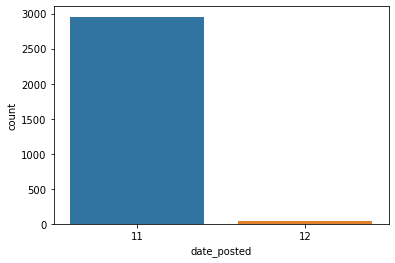

In [17]:
sns.countplot(df.date_posted.dt.month)

In [18]:
df.date_posted.dt.day

0       27
1       26
2       14
3        9
4       15
        ..
2995    14
2996    15
2997    14
2998    26
2999    19
Name: date_posted, Length: 3000, dtype: int64

In [19]:
df.date_posted.dt.weekday

0       4
1       3
2       5
3       0
4       6
       ..
2995    5
2996    6
2997    5
2998    3
2999    3
Name: date_posted, Length: 3000, dtype: int64

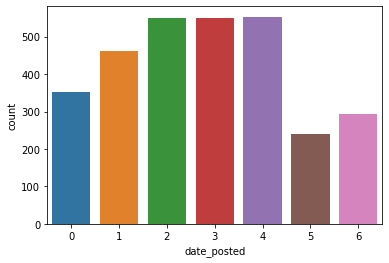

In [20]:
sns.countplot(df.date_posted.dt.weekday)

In [21]:
df['day_of_week'] = df.date_posted.dt.weekday.map(lambda i: 'weekday' if i<5 else 'weekend')

In [22]:
df.head()

,job_title,job_description,date_posted,company_name,day_of_week
0,BUSINESS DEVELOPMENT (FREIGHT FORWARDING),- Roles &amp; Responsibilities : Job Role Desc...,2020-11-27,CALL LADE ENTERPRISES PTE LTD,weekday
1,Secretary/PA,- Roles &amp; Responsibilities : Job Scope:<br...,2020-11-26,TALENT TRADER GROUP PTE. LTD.,weekday
2,Temporary 3-6months Admin Assistant (Office ho...,Monday to Friday Office hoursLocation : Buona ...,2020-11-14,Confidential,weekend
3,Program Management,- Roles &amp; Responsibilities : Key Responsib...,2020-11-09,YASH TECHNOLOGIES SINGAPORE PTE. LIMITED,weekday
4,Automotive Software Engineers (C Programming /...,&bull; MNC&bull; $3500 - $6000 Basic + AWS + V...,2020-11-15,Confidential,weekend


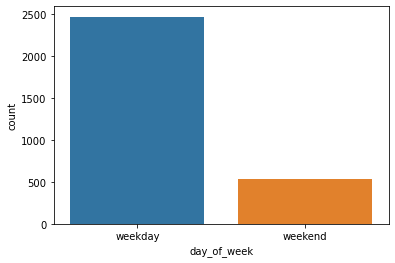

In [23]:
sns.countplot(df['day_of_week'])

In [24]:
stopwords = set(STOPWORDS)

In [25]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(16, 16))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

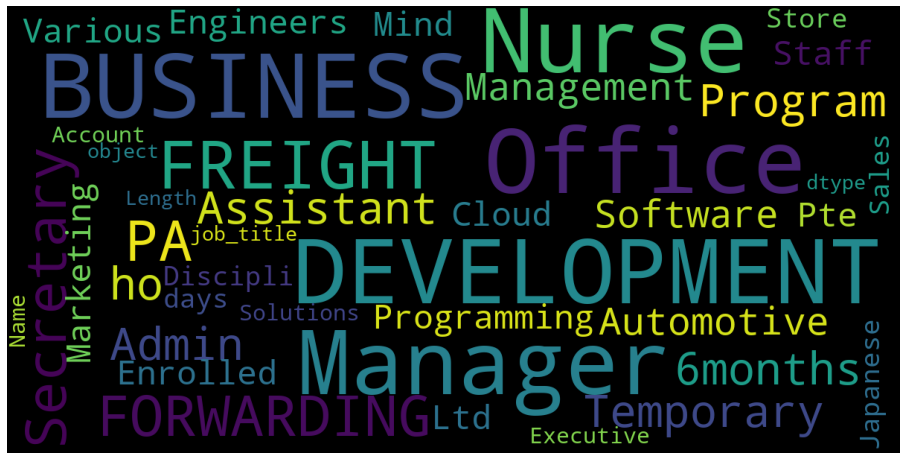

In [26]:
show_wordcloud(df['job_title'])

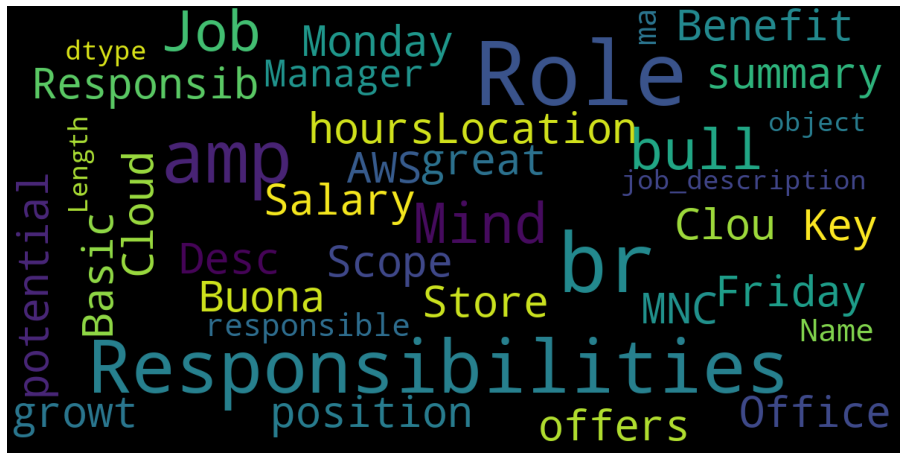

In [27]:
show_wordcloud(df['job_description'])

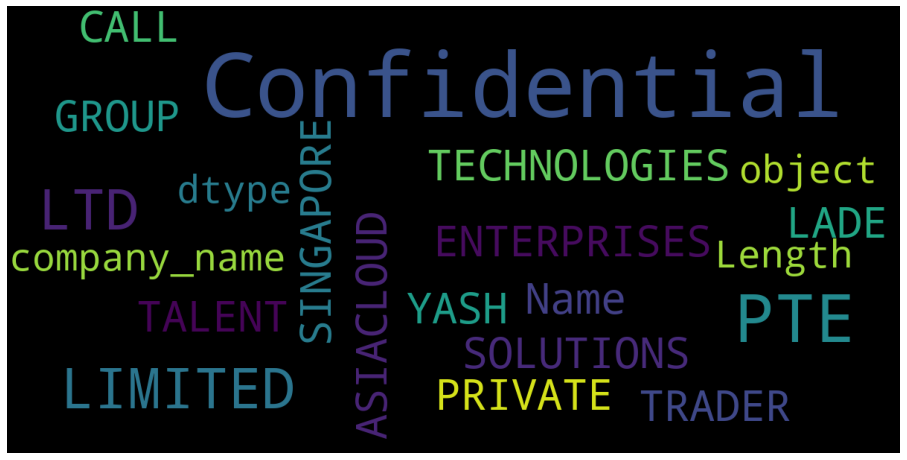

In [28]:
show_wordcloud(df['company_name'])

In [29]:
df['reveal'] = df['company_name'].str.contains('Confidential').astype(int)

In [30]:
df.head()

,job_title,job_description,date_posted,company_name,day_of_week,reveal
0,BUSINESS DEVELOPMENT (FREIGHT FORWARDING),- Roles &amp; Responsibilities : Job Role Desc...,2020-11-27,CALL LADE ENTERPRISES PTE LTD,weekday,0
1,Secretary/PA,- Roles &amp; Responsibilities : Job Scope:<br...,2020-11-26,TALENT TRADER GROUP PTE. LTD.,weekday,0
2,Temporary 3-6months Admin Assistant (Office ho...,Monday to Friday Office hoursLocation : Buona ...,2020-11-14,Confidential,weekend,1
3,Program Management,- Roles &amp; Responsibilities : Key Responsib...,2020-11-09,YASH TECHNOLOGIES SINGAPORE PTE. LIMITED,weekday,0
4,Automotive Software Engineers (C Programming /...,&bull; MNC&bull; $3500 - $6000 Basic + AWS + V...,2020-11-15,Confidential,weekend,1


In [31]:
df['text'] = df['job_title'] + df['job_description']

In [32]:
df.drop(['job_title', 'job_description'], axis=1, inplace=True)
df = df[['text', 'company_name','date_posted', 'day_of_week', 'reveal']]
df.head()

,text,company_name,date_posted,day_of_week,reveal
0,BUSINESS DEVELOPMENT (FREIGHT FORWARDING)- Rol...,CALL LADE ENTERPRISES PTE LTD,2020-11-27,weekday,0
1,Secretary/PA- Roles &amp; Responsibilities : J...,TALENT TRADER GROUP PTE. LTD.,2020-11-26,weekday,0
2,Temporary 3-6months Admin Assistant (Office ho...,Confidential,2020-11-14,weekend,1
3,Program Management- Roles &amp; Responsibiliti...,YASH TECHNOLOGIES SINGAPORE PTE. LIMITED,2020-11-09,weekday,0
4,Automotive Software Engineers (C Programming /...,Confidential,2020-11-15,weekend,1


In [33]:
# I have seen some emojis in review, it needs to be removed
def strip_emoji(text):
    RE_EMOJI = re.compile(u'([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])')
    return RE_EMOJI.sub(r'', text)

In [34]:
def cleaner(text):
    # Make lowercase
    text = text.lower()
    
    # Remove non-letters
    text = re.sub("[^a-zA-Z]", " ", text)

    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)
    
    # Remove punctuation and split 's, 't, 've with a space for filter
    text = re.sub(r'[' + string.punctuation.replace('@', '') + ']+', ' ', text)
    
    # Remove words with 2 or fewer letters
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove whitespace (including new line characters)
    text = re.sub(r'\s\s+', ' ', text)
    
    # Remove emoji
    text = strip_emoji(text)
    
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    text = ''.join(c for c in text if c <= '\uFFFF') 
    
    return text

In [35]:
df['text'] = df['text'].apply(cleaner)

In [36]:
lemmatizer = WordNetLemmatizer()

In [37]:
def lemmatize_words(text):
    words = text.split()
    lemma_words = ''
    for word in words:
        lemma_words += (lemmatizer.lemmatize(word) + ' ')
    return lemma_words

In [38]:
df['text'] = df['text'].apply(lemmatize_words)

In [39]:
df.to_csv("./dataset/df_cleaned.csv", index=False)

In [40]:
df_cleaned = pd.read_csv("./dataset/df_cleaned.csv")
df_cleaned.head()

,text,company_name,date_posted,day_of_week,reveal
0,business development freight forwarding role a...,CALL LADE ENTERPRISES PTE LTD,2020-11-27,weekday,0
1,secretary role amp responsibility job scope fu...,TALENT TRADER GROUP PTE. LTD.,2020-11-26,weekday,0
2,temporary month admin assistant office hour jo...,Confidential,2020-11-14,weekend,1
3,program management role amp responsibility key...,YASH TECHNOLOGIES SINGAPORE PTE. LIMITED,2020-11-09,weekday,0
4,automotive software engineer programming sec g...,Confidential,2020-11-15,weekend,1


## Classification

In [41]:
X = df_cleaned['text']
y = df_cleaned['reveal']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101, stratify=y)

In [43]:
y.value_counts(normalize=True)

1    0.505333
0    0.494667
Name: reveal, dtype: float64

In [166]:
#t0 = time.time()

#pipe = Pipeline([
    #('tfidf', TfidfVectorizer()),
    #('lr', LogisticRegression())])
#params = {
    #'tfidf__stop_words': [None, 'english'],
    #'tfidf__ngram_range': [(1, 1), (1, 2)],
    #'tfidf__max_df': [.07, .08, .85, .95, 1],
    #'tfidf__min_df': [2, 4, 6],
    #'tfidf__max_features': [1000, 2000, 3000, 4000, 5000],
    #'lr__C': [1, .05],
    #'lr__penalty':['l1','l2']}
#gs = GridSearchCV(pipe, param_grid=params, cv=5, n_jobs=-1)
#gs.fit(X_train, y_train)

# Stop our timer and print the result.
#print(time.time()-t0)

In [167]:
#print('best score:', gs.best_score_)

In [168]:
#print('best params:', gs.best_params_)

In [44]:
tfidf = TfidfVectorizer(analyzer = "word",
                     stop_words='english',
                     max_df=0.85,
                     min_df=4,
                     ngram_range=(1,2),
                     max_features=2000)

In [45]:
X_train_tfidf = pd.DataFrame(tfidf.fit_transform(X_train).todense(),
                          columns = tfidf.get_feature_names())

In [46]:
X_test_tfidf = pd.DataFrame(tfidf.transform(X_test).todense(),
                         columns = tfidf.get_feature_names())

In [47]:
lr = LogisticRegression(penalty='l2', C=1)

In [48]:
lr.fit(X_train_tfidf,y_train)

LogisticRegression(C=1)

In [49]:
y_pred = lr.predict(X_test_tfidf)

In [50]:
cross_val_score(lr, X_train_tfidf, y_train, cv=5).mean()

0.8696517412935323

In [51]:
print('mean accuracy on itself:', lr.score(X_train_tfidf, y_train))
print('mean accuracy on test set:', lr.score(X_test_tfidf, y_test))

mean accuracy on itself: 0.9393034825870646
mean accuracy on test set: 0.8595959595959596


In [52]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[433  57]
 [ 82 418]]


              precision    recall  f1-score   support

           0       0.84      0.88      0.86       490
           1       0.88      0.84      0.86       500

    accuracy                           0.86       990
   macro avg       0.86      0.86      0.86       990
weighted avg       0.86      0.86      0.86       990



In [53]:
lr_coef_value = pd.DataFrame(data=lr.coef_.T, index=tfidf.get_feature_names())
lr_coef_value.columns = ['coef']
lr_coef_value['exp_coef'] = np.exp(lr_coef_value['coef'])
lr_coef_value.sort_values(by='exp_coef', ascending=False).head(10)

,coef,exp_coef
pte,4.832220,125.489259
nbsp protected,2.759010,15.784210
protected,2.567431,13.032304
email nbsp,2.389203,10.904802
email,1.761218,5.819522
apply,1.642380,5.167456
ltdjob,1.639198,5.151034
pte ltdjob,1.540930,4.668929
acirc nbsp,1.402208,4.064162
shift,1.254687,3.506740


## Clustering

In [54]:
text = df_cleaned['text'].tolist()
company_name = df_cleaned['company_name'].tolist()
date_posted = df_cleaned['date_posted'].tolist()
day_of_week = df_cleaned['day_of_week'].tolist()
reveal = df_cleaned['reveal'].tolist()

In [55]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [56]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [57]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [58]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in text:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [59]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 630527 items in vocab_frame


In [60]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, max_features=2000,
                                 min_df=4, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,2))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(text) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

/Users/ytz/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


CPU times: user 12.7 s, sys: 111 ms, total: 12.8 s
Wall time: 13.5 s
(3000, 2000)


In [61]:
terms = tfidf_vectorizer.get_feature_names()

In [62]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

In [113]:
num_clusters = 3

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 1.02 s, sys: 34.9 ms, total: 1.05 s
Wall time: 385 ms


In [114]:
import joblib

joblib.dump(km,  'doc_cluster.pkl')

km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

In [115]:
jobs = {'text': text, 
         'company_name': company_name, 
         'date_posted': date_posted, 
         'day_of_week': day_of_week,
        'reveal': reveal}

In [119]:
frame = pd.DataFrame(jobs, index = [clusters], columns = ['text', 'company_name', 'date_posted','day_of_week', 'reveal'])

In [120]:
frame.reset_index(inplace=True)
frame = frame.rename(columns = {'index':'cluster'})

In [124]:
frame['cluster'] = frame['level_0']
frame.drop('level_0', axis=1, inplace=True)

In [127]:
frame.head()
frame['cluster'].value_counts()

2    2514
0     337
1     149
Name: cluster, dtype: int64

In [128]:
grouped = frame['reveal'].groupby(frame['cluster']) #groupby cluster for aggregation purposes

grouped.mean()
# Seems like all clusters have high rating

cluster
0    0.403561
1    0.583893
2    0.514320
Name: reveal, dtype: float64

In [133]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :20]: #showing the first 20 words
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace

print()
print()

Top terms per cluster:

Cluster 0 words: b'bull', b'manage', b'requirement', b'working', b'business', b'nbsp', b'development', b'experience', b'banking', b'team', b'requirement', b'project', b'amp', b'application', b'bull', b'data', b'process', b'market', b'operating', b'skill',

Cluster 1 words: b'nbsp', b'nbsp', b'middot', b'bull', b'manage', b'working', b'amp', b'email', b'day', b'middot', b'application', b'experience', b'job', b'requirement', b'rsquo', b'support', b'responsibility', b'development', b'team', b'data',

Cluster 2 words: b'nbsp', b'working', b'manage', b'amp', b'experience', b'requirement', b'customer', b'development', b'responsibility', b'service', b'project', b'team', b'job', b'product', b'middot', b'business', b'skill', b'sale', b'engineer', b'support',





In [134]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [135]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3'}

#set up cluster names using a dict
cluster_names = {0: 'Manage, Requirement, Team', 
                 1: 'nbsp, middot, application', 
                 2: 'Manage, Customer, Service'}

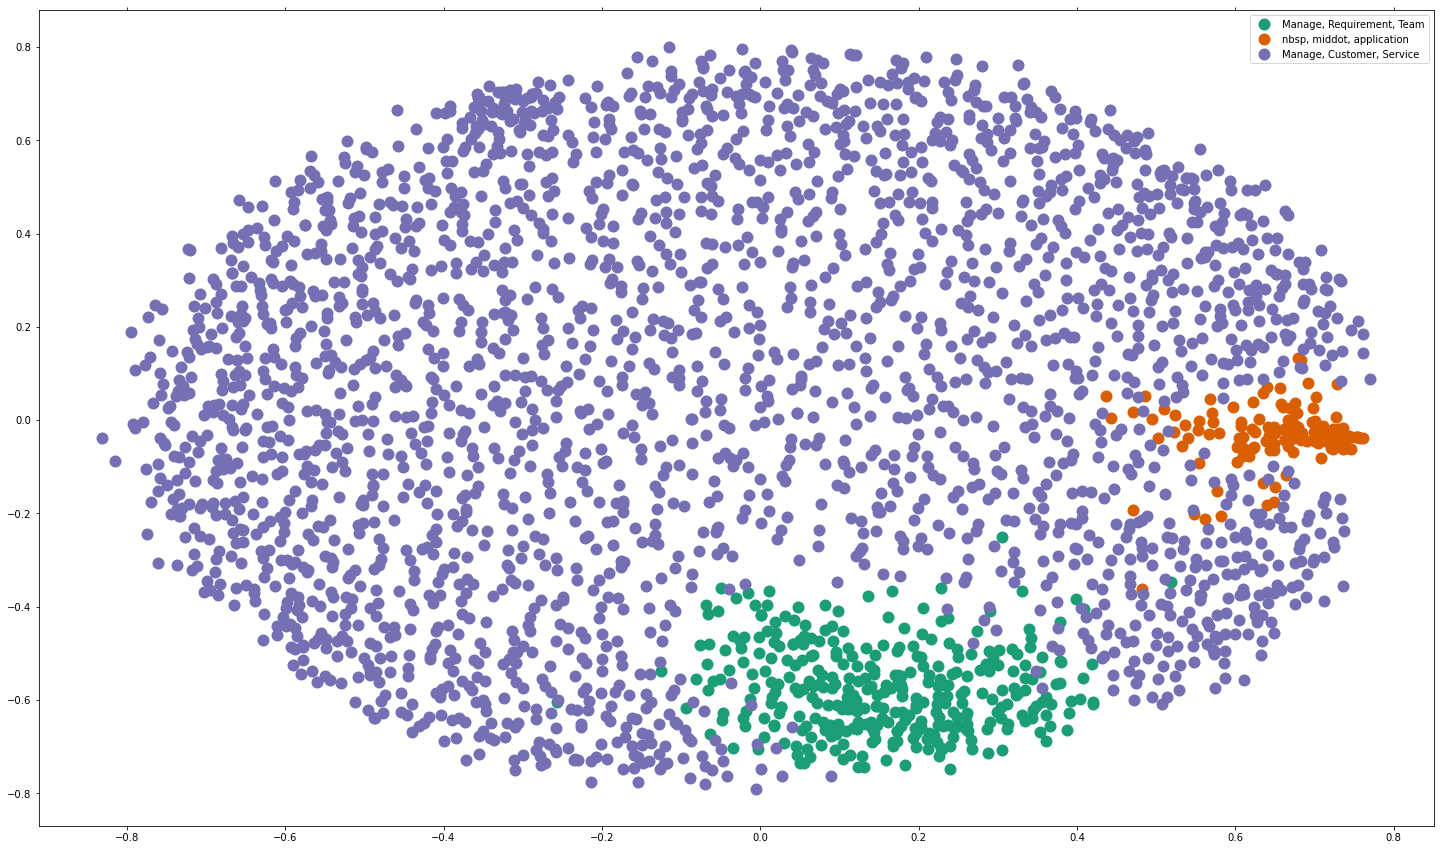

In [137]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=text)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(25, 15)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
#for i in range(len(df)):
    #ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=8)  

    
    
plt.show() #show the plot

In [138]:
plt.close()

In [139]:
silhouette_score(tfidf_matrix, km.labels_)

0.03311907155378498

In [148]:
scores = []
for k in range(2, 6):
    cl = KMeans(n_clusters=k)
    cl.fit(tfidf_matrix)
    inertia = cl.inertia_
    sil = silhouette_score(tfidf_matrix, cl.labels_)
    scores.append([k, inertia, sil])
    
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']

In [149]:
score_df.head()

,k,inertia,silhouette
0,2,2669.192852,0.022994
1,3,2589.439388,0.033051
2,4,2544.814585,0.041358
3,5,2511.513144,0.044636


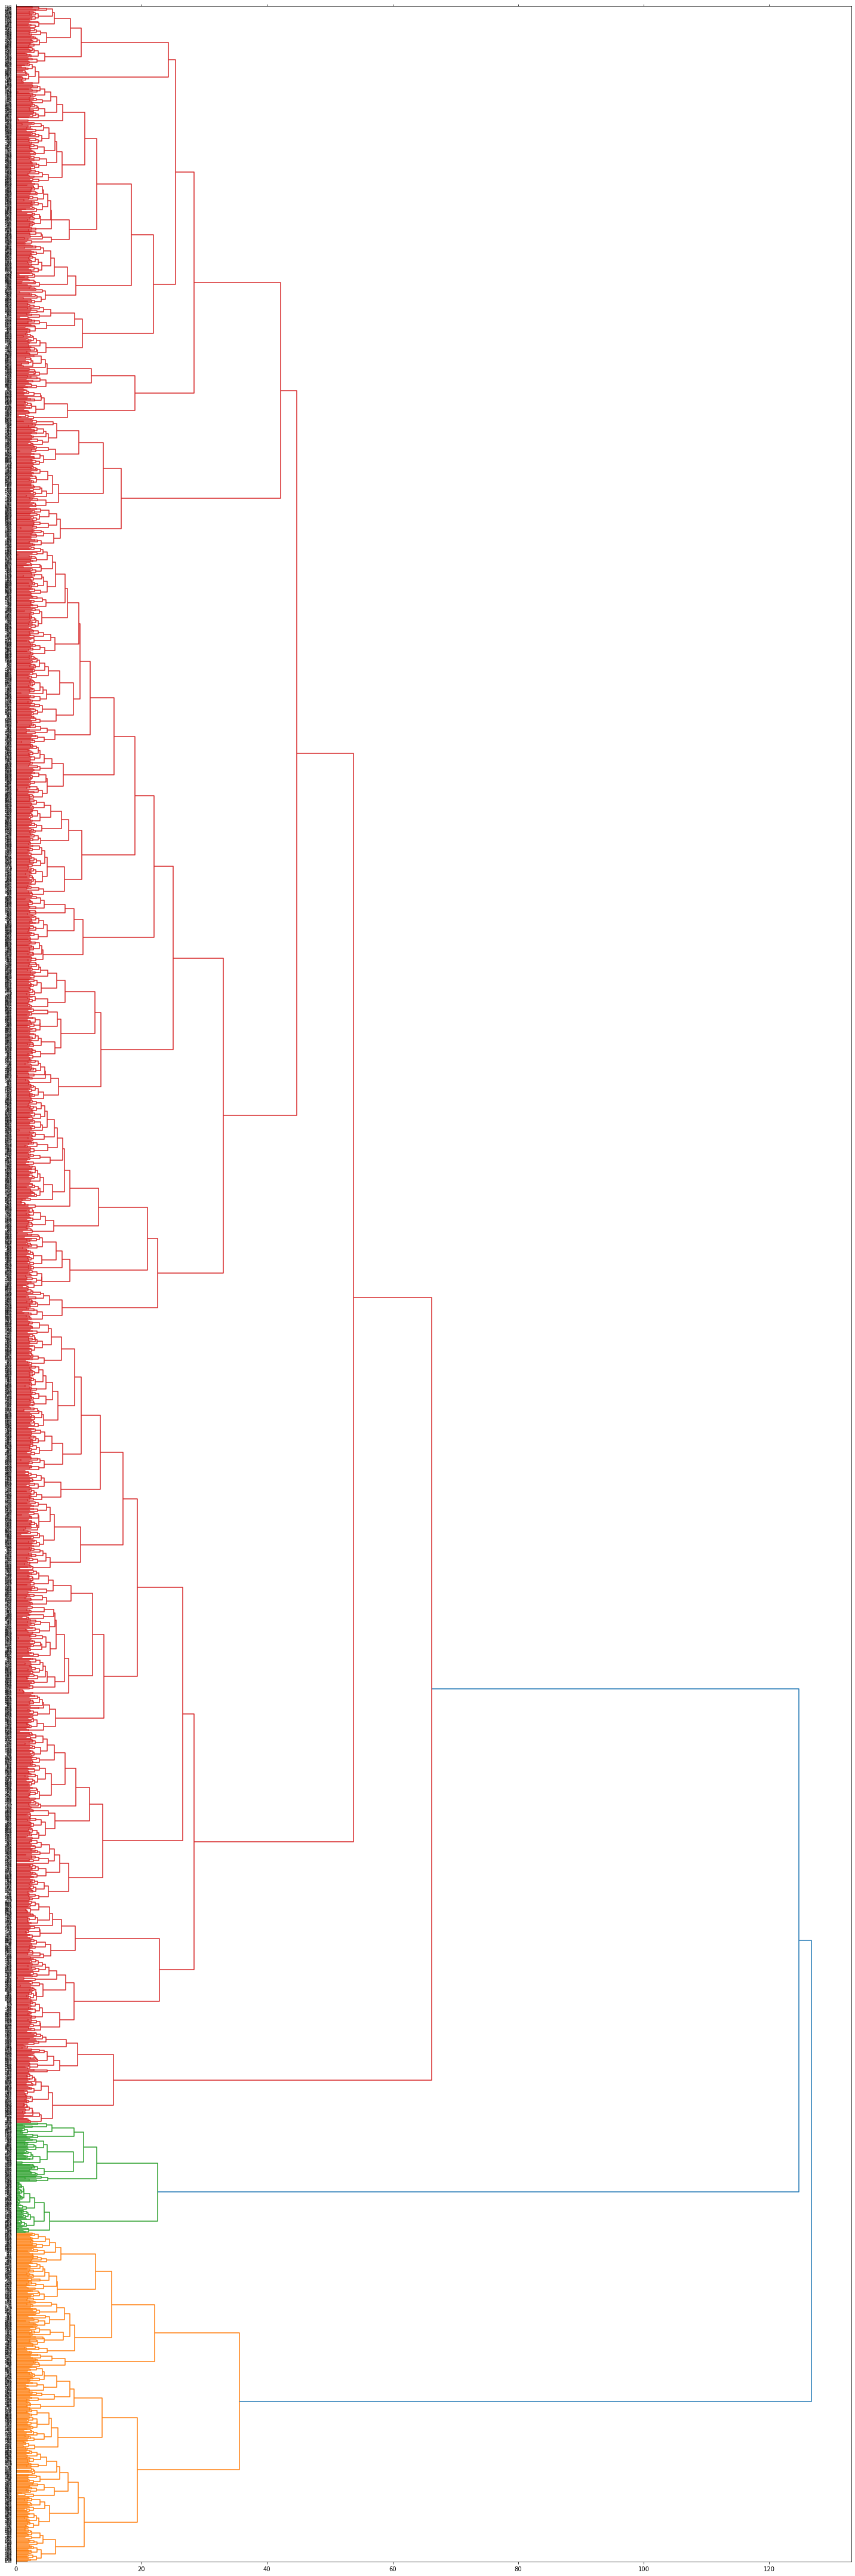

In [150]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(20, 60)) # set size
ax = dendrogram(linkage_matrix, orientation="right");

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [151]:
plt.close()

In [152]:
import string
def strip_proppers(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.islower()]
    return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip()

In [153]:
from nltk.tag import pos_tag

In [154]:
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

In [155]:
stopwords = nltk.corpus.stopwords.words('english')

In [157]:
from gensim import corpora, models, similarities 

#remove proper names
%time preprocess = [strip_proppers(doc) for doc in text]

#tokenize
%time tokenized_text = [tokenize_and_stem(text) for text in preprocess]

#remove stop words
%time texts = [[word for word in text if word not in stopwords] for text in tokenized_text]

CPU times: user 3.48 s, sys: 8.56 ms, total: 3.49 s
Wall time: 3.5 s
CPU times: user 11.7 s, sys: 101 ms, total: 11.8 s
Wall time: 12 s
CPU times: user 1.13 s, sys: 12.5 ms, total: 1.14 s
Wall time: 1.17 s


In [158]:
#create a Gensim dictionary from the texts
dictionary = corpora.Dictionary(texts)

#remove extremes (similar to the min/max df step used when creating the tf-idf matrix)
dictionary.filter_extremes(no_below=1, no_above=0.8)

#convert the dictionary to a bag of words corpus for reference
corpus = [dictionary.doc2bow(text) for text in texts]

In [159]:
%time lda = models.LdaModel(corpus, num_topics=3, id2word=dictionary, update_every=5, chunksize=10000, passes=100)

CPU times: user 16min 13s, sys: 2.79 s, total: 16min 16s
Wall time: 8min 19s


In [160]:
lda.show_topics()

[(0,
  '0.015*"manag" + 0.010*"market" + 0.010*"develop" + 0.010*"team" + 0.009*"experi" + 0.009*"skill" + 0.009*"sale" + 0.009*"busi" + 0.007*"custom" + 0.007*"communic"'),
 (1,
  '0.021*"bull" + 0.016*"manag" + 0.013*"experi" + 0.012*"develop" + 0.010*"team" + 0.010*"project" + 0.009*"system" + 0.009*"busi" + 0.008*"data" + 0.008*"support"'),
 (2,
  '0.062*"nbsp" + 0.010*"amp" + 0.009*"job" + 0.009*"bull" + 0.009*"respons" + 0.008*"experi" + 0.008*"pte" + 0.008*"email" + 0.008*"candid" + 0.007*"resum"')]

In [161]:
topics_matrix = lda.show_topics(formatted=False, num_words=20)
topics_matrix = np.array(topics_matrix)

topic_words = topics_matrix[:,1]
for i in topic_words:
    print([str(word) for word in i])
    print()

["('manag', 0.015162013)", "('market', 0.010477467)", "('develop', 0.009648125)", "('team', 0.009550882)", "('experi', 0.00896312)", "('skill', 0.008783529)", "('sale', 0.00875884)", "('busi', 0.008552249)", "('custom', 0.007372285)", "('communic', 0.0070902463)", "('respons', 0.006383563)", "('rsquo', 0.0063241892)", "('client', 0.006152745)", "('amp', 0.0058961986)", "('servic', 0.005496669)", "('nbsp', 0.0054679937)", "('product', 0.0052831094)", "('role', 0.005006264)", "('research', 0.0049842824)", "('plan', 0.0046756216)"]

["('bull', 0.020544084)", "('manag', 0.015650006)", "('experi', 0.012786837)", "('develop', 0.011706128)", "('team', 0.010142737)", "('project', 0.009927864)", "('system', 0.009271378)", "('busi', 0.008902191)", "('data', 0.008278346)", "('support', 0.008033098)", "('technolog', 0.0074264146)", "('process', 0.007399304)", "('engin', 0.0072839186)", "('respons', 0.0067466265)", "('design', 0.0066513806)", "('skill', 0.00664317)", "('amp', 0.0065349024)", "('pro

### Segments
- Manager, team management, business development
- Skilled, Wed Development, HTML
- Consultants, Customer Support, Service provider